# Agg. m6a methylation CTCF profiles

total rows per file
* 901,751,569: CTCF_m6a_fiberseq_M.txt
* 559,099,577: CTCF_m6a_fiberseq_L.txt
* 474,087,392: CTCF_m6a_fiberseq_XL.txt

<br>within 100 bp of CTCF start site
* 20,099,590: CTCF_m6a_fiberseq_M_100bp.txt
* 12,766,252: CTCF_m6a_fiberseq_L_100bp.txt
* 10,990,813: CTCF_m6a_fiberseq_XL_100bp.txt

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tictoc)
library(ggsci)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tictoc'


The following object is masked from 'package:data.table':

    shift




In [2]:
while (!is.null(dev.list()))  dev.off()
rm(list=ls())

#------------ Helper Functions ------------
# Initiate PDF
openPDF <- function (output_file_fh, pdf_dims) {
  print(sprintf("Saving plots to: %s", output_file_fh))
  # Open PDF
  pdf(output_file_fh, width = pdf_dims[1], height = pdf_dims[2],
      useDingbats=FALSE, family = "ArialMT")
}

# Close PDF
closePDF <- function () {
  while (!is.null(dev.list()))  dev.off()
  print("File saved.")
}

In [4]:
#------------ Step 1. Load data ------------
setwd("/mmfs1/gscratch/stergachislab/mwperez/ctcf-footprinting")

#ARGS
output_folder <- sprintf("%s/figures", getwd())
data_folder <- sprintf("%s/candidate_footprints", getwd())

In [5]:
# CTCF motif types
motif_types <- c("M", "L", "XL")

In [21]:
tic()
# set args
motif_type <- "M"
ctcf_dist <- c(-100,100)
n_rows <- 20000

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

print(unique(df_all$centered_position_type))

# subset table to first n rows
#df <- df_all
#sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
#df <- filter(df, centered_position_type == "m6a")
#sprintf("m6a rows: %s", dim(df)[1])

toc()

[1] 20000    12

[1] "m6a" "5mC" "msp" "nuc"
0.079 sec elapsed


In [ ]:
df_all[df_all$query_name == df_all$query_name[1]]

In [29]:
colnames(df_all)

[1] "chrom"                  "centering_position"     "strand"                
 [4] "reference_start"        "reference_end"          "query_name"            
 [7] "centered_query_start"   "centered_query_end"     "query_length"          
[10] "centered_position_type" "centered_start"         "centered_end"

In [25]:
df_all[df_all$query_name == df_all$query_name[1] & df_all$centered_position_type %in% c("m6a", "msp")]# & df_all$centered_start == df_all$centered_start[1]]

chrom,centering_position,strand,reference_start,reference_end,query_name,centered_query_start,centered_query_end,query_length,centered_position_type,centered_start,centered_end
<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-91,-90
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-81,-80
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-76,-75
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-73,-72
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-64,-63
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-61,-60
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-54,-53
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-52,-51
chr1,778834,-,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,4695,28558,m6a,-35,-34


### CTCF M

In [9]:
tic()
# set args
motif_type <- "M"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique CTCF motifs: %s", length(unique(df$query_name)))
toc()

[1] 20099589       12

[1] "initiral rows: 20099589"

[1] "m6a rows: 17873570"

[1] "--100, +100 rows: 17835118"

[1] "unique CTCF motifs: 479731"

8.026 sec elapsed


In [27]:
colnames(df)

[1] "chrom"                  "centering_position"     "strand"                
 [4] "reference_start"        "reference_end"          "query_name"            
 [7] "centered_query_start"   "centered_query_end"     "query_length"          
[10] "centered_position_type" "centered_start"         "centered_end"

In [10]:
#---------- create df for merged data ----------
df$motif_type <- motif_type
# add col w/ motif type
df_m <- df

In [12]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_M.pdf"

7.589 sec elapsed


Saving 6.67 x 6.67 in image


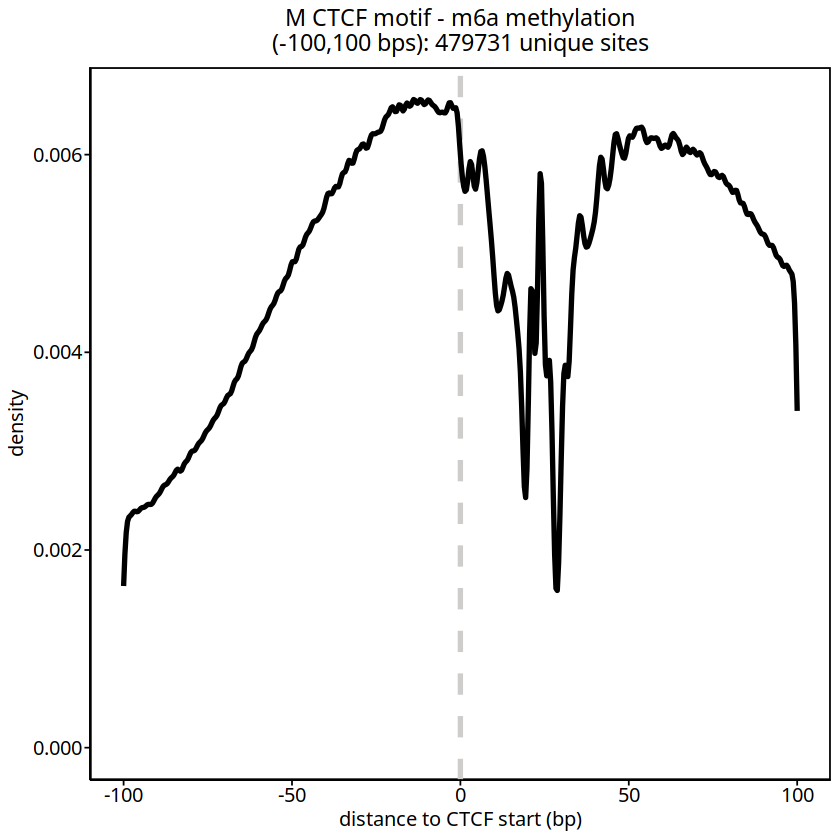

In [13]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF L

In [11]:
tic()
# set args
motif_type <- "L"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique CTCF motifs: %s", length(unique(df$query_name)))
toc()

[1] 12766251       12

[1] "initiral rows: 12766251"

[1] "m6a rows: 11486734"

[1] "--100, +100 rows: 11464358"

[1] "unique CTCF motifs: 328820"

4.857 sec elapsed


In [12]:
#---------- merge with main df----------
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)

In [21]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_L.pdf"

3.37 sec elapsed


Saving 6.67 x 6.67 in image


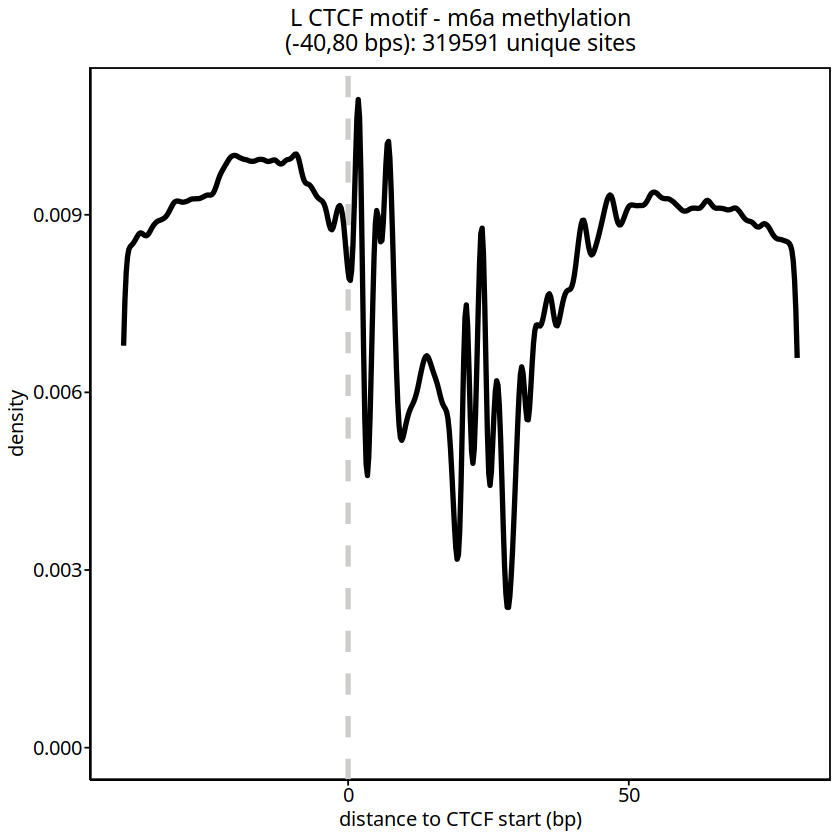

In [22]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

### CTCF XL

In [13]:
tic()
# set args
motif_type <- "XL"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_m6a_fiberseq_%s_100bp.txt", motif_type)
data_file <- sprintf("%s/%s", data_folder, data_file_name)

# read table
df_all <- fread(data_file, nrows=n_rows)
dim(df_all)

# subset table to first n rows
df <- df_all
sprintf("initial rows: %s", dim(df)[1])
# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", dim(df)[1])
# filter by +/- 40 bp around centering site
df <- filter(df, centered_start >= ctcf_dist[1] & centered_start <= ctcf_dist[2])
sprintf("-%s, +%s rows: %s", ctcf_dist[1], ctcf_dist[2], dim(df)[1])
# unique CTCF motifs
sprintf("unique CTCF motifs: %s", length(unique(df$query_name)))
toc()

[1] 10990812       12

[1] "initiral rows: 10990812"

[1] "m6a rows: 9904718"

[1] "--100, +100 rows: 9884924"

[1] "unique CTCF motifs: 284634"

3.763 sec elapsed


In [14]:
#---------- merge with main df----------
dim(df_m)
# add col w/ motif type
df$motif_type <- motif_type
# merge adding rows
df_m <- rbind(df_m, df)
dim(df_m)

[1] 29299476       13

[1] 39184400       13

In [18]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(5,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_XL.pdf"

4.092 sec elapsed


Saving 6.67 x 6.67 in image


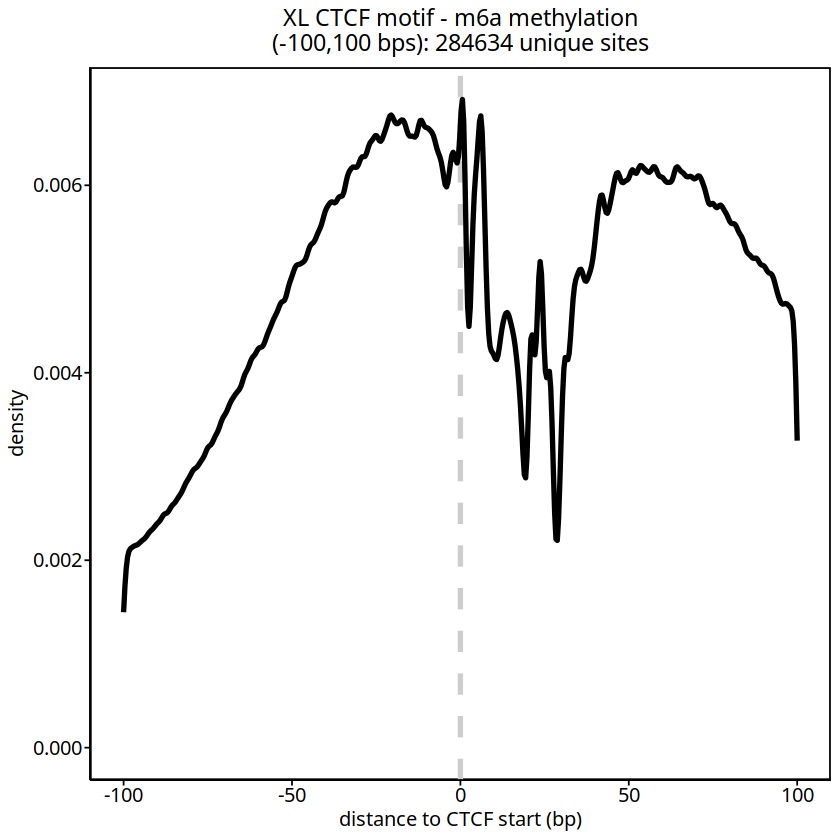

In [19]:
tic()

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("%s CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

p <- ggplot(df, aes(x=centered_start)) +
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1.5) +
    geom_density(size=1.5, adjust=0.5) +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p)
}

# merged plot (overlayed)

In [15]:
# get merged df
motif_type <- "merged"
df_m <- df_m
ctcf_dist <- c(-100,100)

In [51]:
#------------ Set file name ------------
output_file_name <- sprintf("CTCF_m6a_methylation_density_%s.pdf", motif_type)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
output_file

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_m6a_methylation_density_merged.pdf"

19.526 sec elapsed


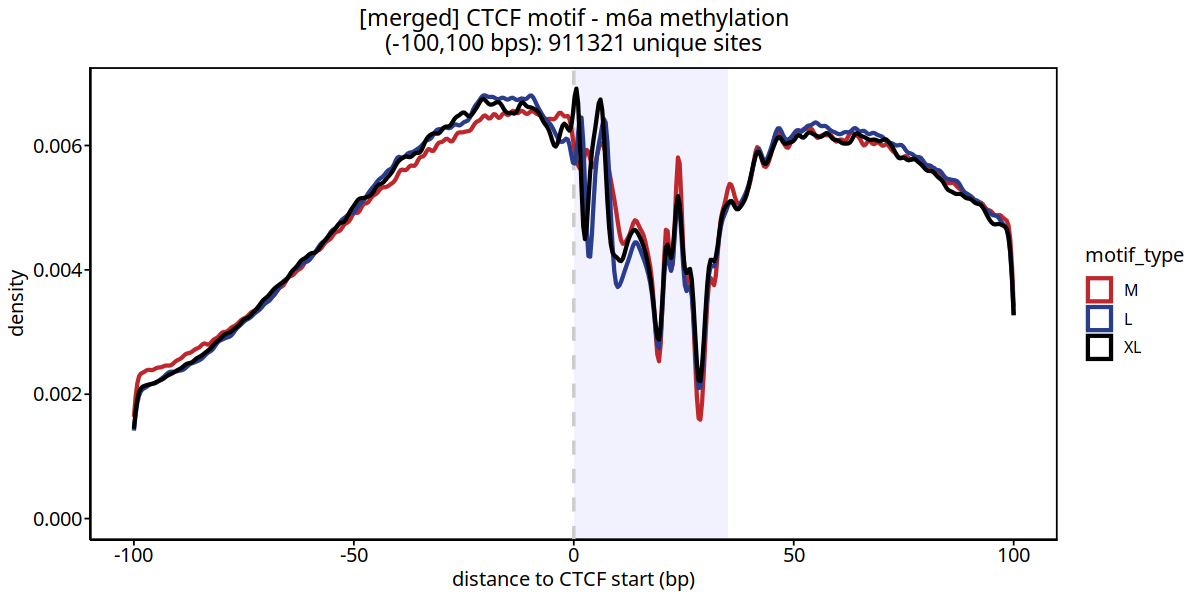

In [52]:
tic()
df_p <- df_m
df_p$motif_type <- factor(df_p$motif_type, levels=c("M", "L", "XL"))

# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("[%s] CTCF motif - m6a methylation\n(%s,%s bps): %s unique sites", 
                      motif_type, ctcf_dist[1], ctcf_dist[2], length(unique(df_p$query_name)))
y_axis_name <- "distance to CTCF start (bp)"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df_p, aes(x=centered_start, group=motif_type)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=motif_type), size=1.2, adjust=0.5) +
    # red, blue, black
    scale_color_manual(values=c("#be282d", "#2a3d8c", "#000000")) +
    #scale_color_manual(values=c("#003f5c", "#bc5090", "#ffa600")) +
    #scale_color_aaas() +

    ggtitle(plot_title) +
    scale_x_continuous(name=y_axis_name, n.breaks=5) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p
toc()

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

# all rows

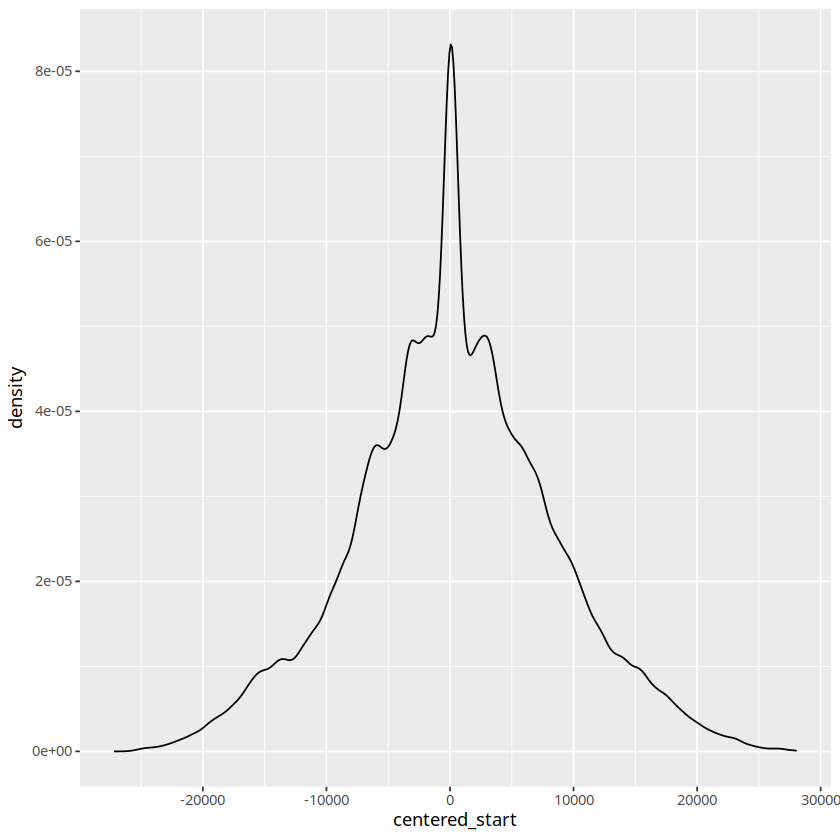

In [26]:
# all rows
p <- ggplot(df, aes(x=centered_start)) + geom_density()
p